In [26]:
from snownlp import SnowNLP
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [45]:
x_trade = pd.read_excel("/Users/martin/Desktop/lab/xiake_trade.xlsx",encoding="gbk") 
b_trade = pd.read_excel("/Users/martin/Desktop/lab/bull_trade.xlsx",encoding="gbk") 

In [3]:
x_trade.head()

,title,date_published,text
0,我这有个一带一路，特朗普你考虑考虑？,2017-04-05,习主席即将开启访美之行。说实话，中美双方这么快就实现元首访问，速度应该是超出了很多人的预期。...
1,首次习特会，这四字最为要害,2017-04-09,中美两国国家元首在“海湖庄园”进行的会晤，恐怕是这几天地球上最抓眼球的事情之一（另一件则是会...
2,昨天结束的这件事，足以写入中美历史,2017-06-23,当地时间21日，中美双方在华盛顿举行了首轮外交安全对话。 今年4月，在海湖庄园峰会上，习近平...
3,中美首轮全面经济对话，外媒居然说“谈崩了”？,2017-07-21,昨天晚上，岛叔的不少微信群里开始流传一幅截图，说“刚刚”！因美方不满意首轮中美全面经济对话，...
4,这一次，美国真的要向中国“开战”？,2017-08-15,北京时间的今天，特朗普终于签下行政令，责成美国贸易代表对中国的“不公平贸易行为”发起调查，也...


In [49]:
b_trade = b_trade.sort_values(by='date_published')

In [44]:
x_trade.shape[0]

58

In [58]:
#Create an empty list to store sentiment of each xiake article
sentiment = [None]*58

for i in range(x_trade.shape[0]):
    s = SnowNLP(x_trade.text.iloc[i])
    a = 0 
    b = 0
    #use this for loop to calcualte the sentiment of each sentences in the article
    for j in range(len(s.sentences)):
        k=SnowNLP(s.sentences[j])
        a+=k.sentiments
        b = a/len(s.sentences)   
    sentiment[i]=b

In [53]:
#Create an empty list to store sentiment of each bull piano article
b_sentiment = [None]*(b_trade.shape[0])

for i in range(b_trade.shape[0]):
    s = SnowNLP(b_trade.text.iloc[i])
    c = 0 
    d = 0
    #use this for loop to calcualte the sentiment of each sentences in the article
    for j in range(len(s.sentences)):
        q=SnowNLP(s.sentences[j])
        c+=q.sentiments
        d = c/len(s.sentences)   
    b_sentiment[i]=d

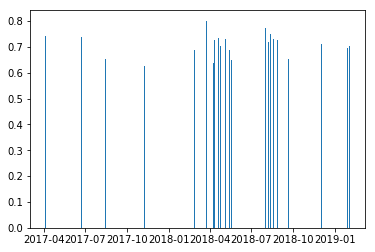

In [59]:
#Plot the sentiment over time by bar chart
sentiment1= np.array(sentiment)
sentiment2 = np.array(b_sentiment)
plt.bar(x_trade.date_published,sentiment1)
plt.show()

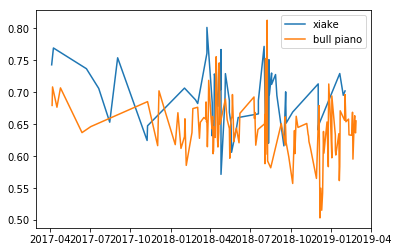

In [60]:
#A line plot
plt.plot(x_trade.date_published,sentiment1,label='xiake')
plt.plot(b_trade.date_published,sentiment2,label='bull piano')
plt.legend()
plt.show()